# **Primera entrega de Machine Learning:**

---


## **Modelos predictivos de calidad y tipo de vinos**
---

#  **1 - Metadata**



### **1.1 - Descripción de los datos.**

Set de vinos blancos y tintos de distinta calidad con sus características y propiedades.

6497 registros. 14 columnas.

Fuente: "https://github.com/alejomedinazanca/wine-project"

"The dataset is related to red and white variants of the Portuguese "Vinho Verde" wine. For more details, consult the reference [Cortez et al., 2009].
These datasets can be viewed as classification or regression tasks."


### **1.2 - Glosario**

    Columnas ----------------------- Descripción
    'fixed acidity' ---------------- 'acidez_fija': Cantidad de ácidos no volátiles en el vino.
    'volatile acidity' ------------- 'acidez_volatil': Medida de los ácidos volátiles.
    'citric acid' ------------------ 'acido_citrico': Ácido natural presente en pequeñas cantidades.
    'residual sugar' --------------- 'azucar_residual': 	Cantidad de azúcar que permanece después de la fermentación.
    'chlorides' -------------------- 'cloruros': Presencia de sales (principalmente cloruro de sodio).
    'free sulfur dioxide' ---------- 'dioxido_azufre_libre': Cantidad de SO₂ libre disponible para proteger el vino de la oxidación y bacterias.,
    'total sulfur dioxide' --------- 'diox_azufre_total': Total de SO₂ presente (libre y combinado). Usado como conservante.
    'density' ---------------------- 'densidad' : Relación entre masa y volumen del vino.,
    'sulphates' -------------------- 'sulfatos : 'Compuestos añadidos que actúan como conservantes antimicrobianos.,
    'alcohol'----------------------- 'alcohol' : Porcentaje de alcohol en volumen (% vol). ,
    'quality' ---------------------- 'calidad' : Puntuación del vino por los catadores (1 - 10),
    'color' ------------------------ 'vino' : Tipo de vino: tinto o blanco.
    'high_quality' ----------------- 'calidad_alta' : Indica si el vino es de calidad alta, a partir de 7 se considera vino de alta calidad

# **2 - Objetivo Analítico**


---

### **2.1 - Objetivo Analítico**
Entrenar distintos tipos de algoritmos que puedan, según corresponda, predecir la calificación de un vino a raíz de sus propiedades o el tipo de vino del que se trata.

### **2.2 - Contexto**
Para seleccionar los mejores vinos de distintas cosechas de uvas, se nos pidió predecir cuáles son los mejores para presentar en un certamen de vinos.

### **2.3 - Problema**
Desde la Asociación de sommeliers están interesados en participar en dicho certamen por lo que buscarían las uvas que presenten las características de los vinos mejor evaluados

### **2.4 - Planteo de hipótesis**
Tenemos la idea de que la calidad de un vino va más allá del gusto y de la apreciación subjetiva de los catadores. El nivel de acidez, la graduación de alcohol, la densidad y otras variables se relacionan entre sí y dan como resultado ditintas clases de vinos. Nos planteamos por el momento pequeñas hipótesis:
-  Un nivel muy alto de acidez produce un vino de peor calidad, y cuanto más bajo es, la calidad aumenta. Quisieramos ver qué tan bajo debe ser.
- La densidad del vino es consecuencia de su acidez, así como el residuo de azucar luego de la fermentación y de la graduación de alcohol

# **3 - Importación de datos**

### **3.1- Importación de librerías y métodos**

In [ ]:
#Importamos las librerías y métodos que se utilizarán en el proyecto

#Para poder acceder a los datos desde una fuente externa
import requests

#Para poder hacer Data Wrangling (limpieza, transformación y análisis de datos)
import pandas as pd
import numpy as np

#Para poder visualizar los datos
import matplotlib.pyplot as plt
import seaborn as sns





### **3.2 - Descarga del archivo .json**

In [ ]:
url = 'https://raw.githubusercontent.com/alejomedinazanca/wine-project/refs/heads/main/wine-data.json'
response = requests.get(url)
data = response.json()

# **4 - Data Wrangling**



In [ ]:
#Vemos la cantidad de datos del que disponemos:
print('Cantidad de vinos: ', len(data))

#Vemos el primer vino del dataset
data[0]

Cantidad de vinos:  6497


{'Unnamed: 0': 0,
 'fixed acidity': 7.4,
 'volatile acidity': 0.7,
 'citric acid': 0.0,
 'residual sugar': 1.9,
 'chlorides': 0.076,
 'free sulfur dioxide': 11.0,
 'total sulfur dioxide': 34.0,
 'density': 0.9978,
 'pH': 3.51,
 'sulphates': 0.56,
 'alcohol': 9.4,
 'quality': 5,
 'color': 'red',
 'high_quality': 0}

In [ ]:
df = pd.DataFrame(data)

#Eliminamos la columna de los indices que quedo cargada sin nombre como 'Unnamed: 0'
df.drop('Unnamed: 0', axis=1, inplace=True)

#
#df = pd.read_csv('wine.csv', index_col = 0) #index_col = 0 para que los indices sean
                                                 #la primera columna que tiene el archivo wine.csv
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color,high_quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,0


In [ ]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,high_quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.633061
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.482007
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,0.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,1.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,1.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


Observamos qué contiene cada columna con el método de pandas DataFrame.info()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  color                 6497 non-null   object 
 13  high_quality          6497 non-null   int64  
dtypes: float64(11), int64(2), object(1)
memory usage: 710.7+ KB


#### Observamos que no hay ninguna columna con datos nulos. Por lo cual, no perderemos tiempo pensando si nos convendría usar dropna(), fillna() o alguna manera de manipular datos nulos. Lo corroboramos con DataFrame.isnull().sum()

In [ ]:
df.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


#### Optamos por traducir los nombres de las columnas del inglés al español

In [ ]:
traducciones = {
    'fixed acidity': 'acidez_fija',
    'volatile acidity': 'acidez_volatil',
    'citric acid': 'acido_citrico',
    'residual sugar': 'azucar_residual',
    'chlorides': 'cloruros',
    'free sulfur dioxide': 'dioxido_azufre_libre',
    'total sulfur dioxide': 'dioxido_azufre_total',
    'density': 'densidad',
    'sulphates': 'sulfatos',
    'alcohol': 'alcohol',
    'quality': 'calidad',
    'color': 'vino',
    'high_quality': 'calidad_alta'
}

In [ ]:
df.rename(columns = traducciones, inplace = True)
df.head()

,acidez_fija,acidez_volatil,acido_citrico,azucar_residual,cloruros,dioxido_azufre_libre,dioxido_azufre_total,densidad,pH,sulfatos,alcohol,calidad,vino,calidad_alta
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,0


### **4.2 - Manipulación de datos**

In [ ]:
df['vino'].unique()

array(['red', 'white'], dtype=object)

#### Vemos que la columna vino (originalmente 'color') tiene dos valores unicos, a saber: 'red' y 'white'. En la siguiente celda los traduciremos a 'tinto' y 'blanco'.

In [ ]:
df['vino'] = df['vino'].map({'red': 'tinto', 'white': 'blanco'})
df.head(10)

,acidez_fija,acidez_volatil,acido_citrico,azucar_residual,cloruros,dioxido_azufre_libre,dioxido_azufre_total,densidad,pH,sulfatos,alcohol,calidad,vino,calidad_alta
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,tinto,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,tinto,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,tinto,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,tinto,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,tinto,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,tinto,0
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,tinto,0
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,tinto,1
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,tinto,1
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,tinto,0


### **4.2 - Trabajo de Outliers**

<Axes: xlabel='vino', ylabel='densidad'>

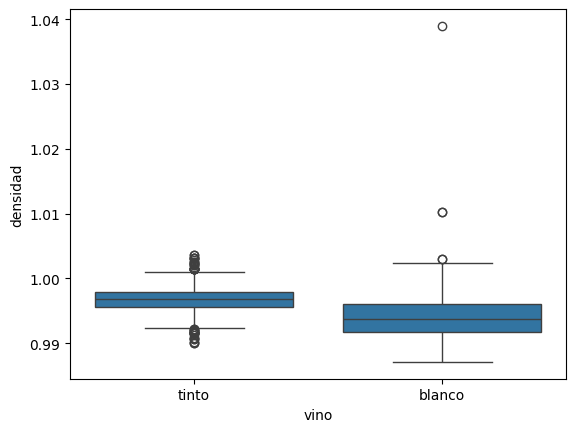

In [ ]:
sns.boxplot(data=df, x='vino', y='densidad')

##### Vemos que en la columna densidad hay muchos outliers. Lo mismo debe suceder en otras columnas. Echaremos un vistazo a continuación.

In [ ]:
# Filtramos solo las columnas numéricas
numeric_cols = df.select_dtypes(include=[np.number]).columns

# Diccionario para guardar resultados
outliers_info = {}

# Recorremos cada columna numérica
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    # Umbrales inferior y superior
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filtramos los outliers
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

    # Guardamos cantidad y porcentaje
    outliers_info[col] = {
        'Cantidad de outliers': len(outliers),
        'Porcentaje (%)': round((len(outliers) / len(df)) * 100, 2),
        'Límite inferior': round(lower_bound, 2),
        'Límite superior': round(upper_bound, 2)
    }

# Convertimos el diccionario a DataFrame para visualizar
outliers_df = pd.DataFrame(outliers_info).T.sort_values(by='Porcentaje (%)', ascending=False)
display(outliers_df)

,Cantidad de outliers,Porcentaje (%),Límite inferior,Límite superior
acido_citrico,509.0,7.83,0.04,0.60
acidez_volatil,377.0,5.80,-0.02,0.66
acidez_fija,357.0,5.49,4.45,9.65
cloruros,286.0,4.40,-0.00,0.11
calidad,228.0,3.51,3.50,7.50
sulfatos,191.0,2.94,0.18,0.86
azucar_residual,118.0,1.82,-7.65,17.55
pH,73.0,1.12,2.80,3.64
dioxido_azufre_libre,62.0,0.95,-19.00,77.00
dioxido_azufre_total,10.0,0.15,-41.50,274.50


In [ ]:
# Creamos una copia para no alterar el original
wine_df = df.copy()

numeric_cols = wine_df.select_dtypes(include=[np.number]).columns

for col in numeric_cols:
    Q1 = wine_df[col].quantile(0.25)
    Q3 = wine_df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filtramos los registros dentro de los límites
    wine_df = wine_df[(wine_df[col] >= lower_bound) & (wine_df[col] <= upper_bound)]

print(f"Filas originales: {len(df)}")
print(f"Filas luego de eliminar outliers: {len(wine_df)}")


Filas originales: 6497
Filas luego de eliminar outliers: 4418


<Axes: xlabel='vino', ylabel='densidad'>

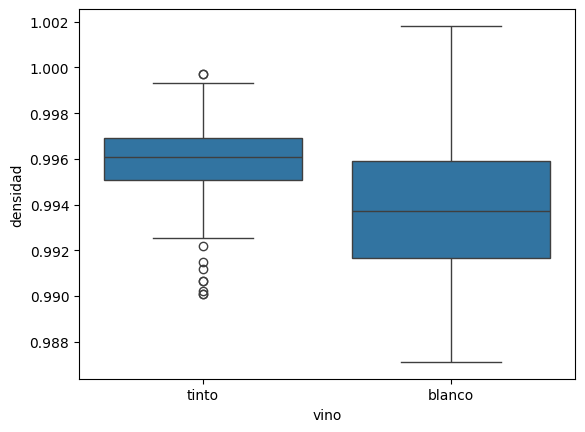

In [ ]:
sns.boxplot(data=wine_df, x='vino', y='densidad')

<Axes: xlabel='vino', ylabel='acidez_volatil'>

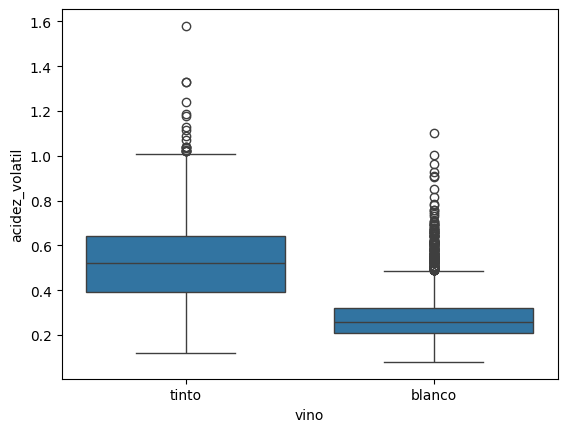

In [ ]:
sns.boxplot(data=df, x='vino', y='acidez_volatil')

##### Ahora vemos que los outliers han desaparecido

# **5 - Visualización de datos**

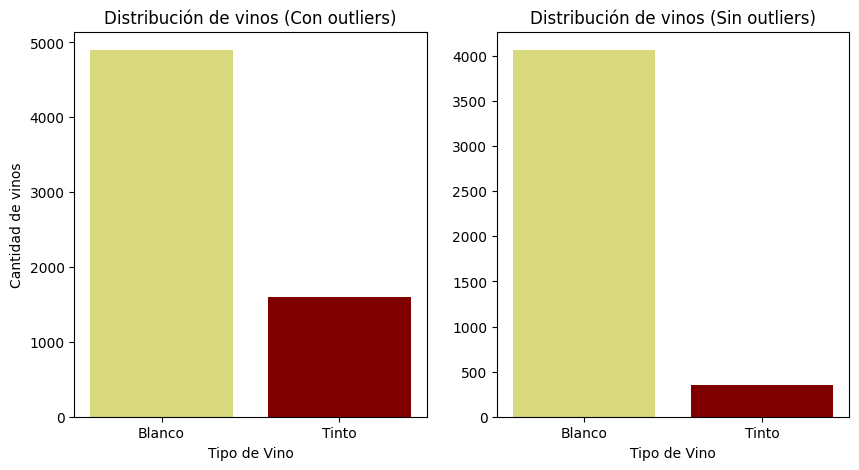

In [ ]:
vinos = df['vino'].value_counts()
vinos_ol = wine_df['vino'].value_counts()

fig, ax = plt.subplots(1,2, figsize = (10,5))
ax[0].bar(vinos.index, vinos, color = ['#d8d87c', '#800000'])
ax[0].set_xticks(ticks = [0,1], labels = vinos.index.str.capitalize())
ax[0].set_title('Distribución de vinos (Con outliers)')
ax[0].set_xlabel('Tipo de Vino')
ax[0].set_ylabel('Cantidad de vinos')

ax[1].bar(vinos_ol.index, vinos_ol, color = ['#d8d87c', '#800000'])
ax[1].set_xticks(ticks = [0,1], labels = vinos_ol.index.str.capitalize())
ax[1].set_title('Distribución de vinos (Sin outliers)')
ax[1].set_xlabel('Tipo de Vino')
plt.show()

Por lo que se puede observar en la gráfica, en el dataset hay más vinos blancos que tintos.

In [ ]:
# Podemos corroborarlo rápidamente con la siguiente función, a saber: groupby()
df.groupby('vino')['vino'].value_counts()

,count
vino,
blanco,4898
tinto,1599


Text(0, 0.5, 'Cantidad de vinos')

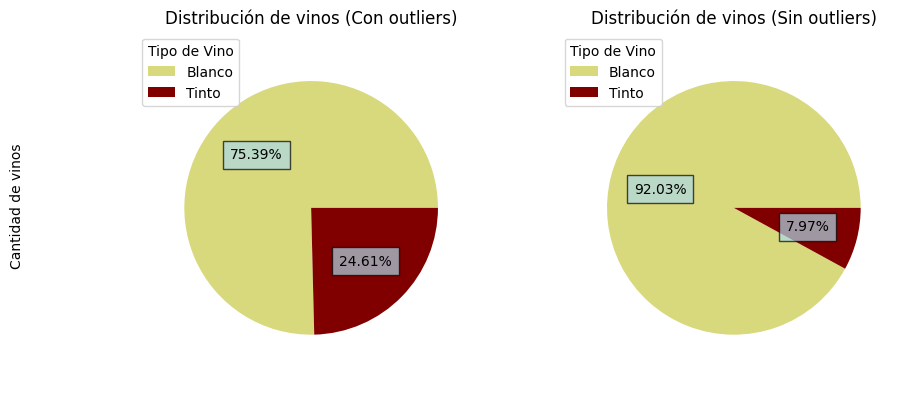

In [ ]:
fig, ax = plt.subplots(1,2, figsize = (10,5))
ax[0].pie(df['vino'].value_counts(),
        autopct= "%.2f%%", colors=['#d8d87c', '#800000'], textprops={'bbox': {'facecolor': 'lightblue', 'alpha': 0.7, 'pad': 5}}, radius=0.9)
ax[0].legend(title='Tipo de Vino', loc='upper left', labels=df['vino'].value_counts().index.str.capitalize())
ax[0].set_title('Distribución de vinos (Con outliers)')

ax[1].pie(wine_df['vino'].value_counts(),
        autopct= "%.2f%%", colors=['#d8d87c', '#800000'], textprops={'bbox': {'facecolor': 'lightblue', 'alpha': 0.7, 'pad': 5}}, radius=0.9)
ax[1].legend(title='Tipo de Vino', loc='upper left', labels=df['vino'].value_counts().index.str.capitalize())
ax[1].set_title('Distribución de vinos (Sin outliers)')

fig.text(0,0.5,'Cantidad de vinos', va = 'center', rotation = 'vertical')

Para hacer un gráfico de líneas, podemos tomar dos variables como calidad y la graduación de alcohol y ver esto representado según el tipo de vino

#### Vemos que en el dataset original, los vinos con más outliers son los tintos.

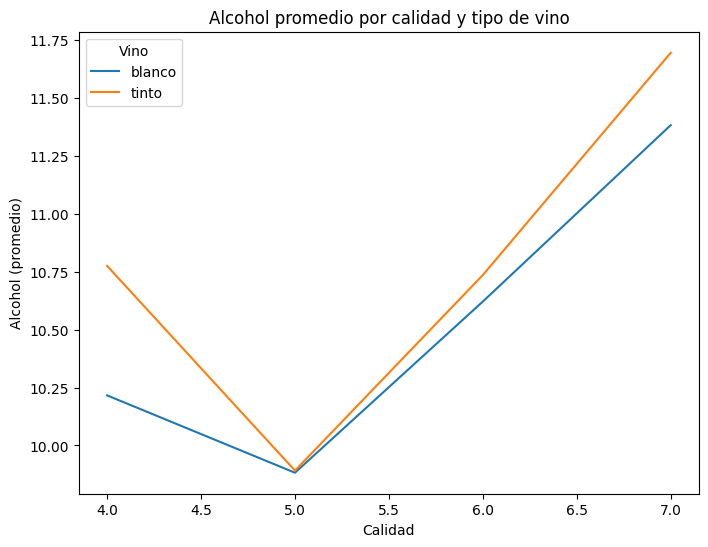

In [ ]:
grupo = wine_df.groupby(['calidad', 'vino'])['alcohol'].mean().reset_index()

fig, ax = plt.subplots(figsize=(8, 6))

for tipo_vino in grupo['vino'].unique():
    sub = grupo[grupo['vino'] == tipo_vino]
    ax.plot(sub['calidad'], sub['alcohol'], label=tipo_vino)

ax.set_xlabel('Calidad')
ax.set_ylabel('Alcohol (promedio)')
ax.set_title('Alcohol promedio por calidad y tipo de vino')
ax.legend(title='Vino')

plt.show()


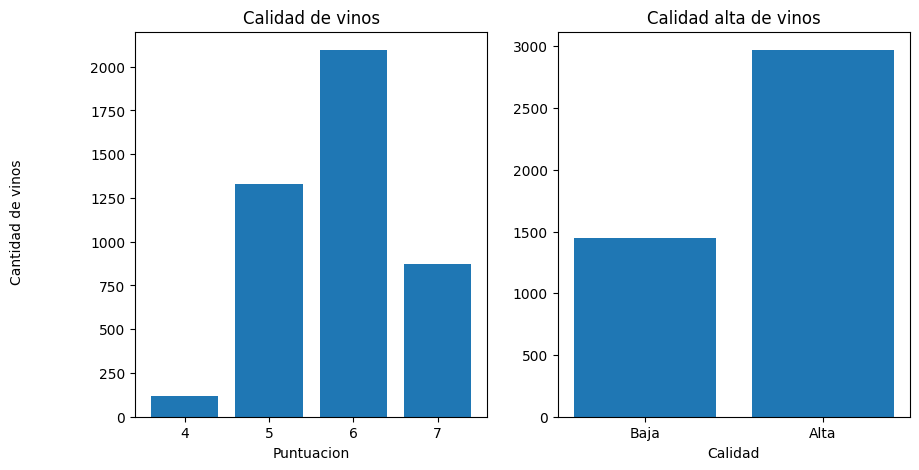

In [ ]:
fig, ax = plt.subplots(1,2, figsize = (10,5))
ax[0].bar(wine_df['calidad'].value_counts().index, wine_df['calidad'].value_counts())
ax[0].set_title('Calidad de vinos')
ax[0].set_xlabel('Puntuacion')

ax[1].bar(wine_df['calidad_alta'].value_counts().index, wine_df['calidad_alta'].value_counts())
ax[1].set_title('Calidad alta de vinos')
ax[1].set_xlabel('Calidad')
ax[1].set_xticks([0,1], labels = ['Baja', 'Alta'])

fig.text(0,0.5,'Cantidad de vinos', va = 'center', rotation = 'vertical')

plt.show()

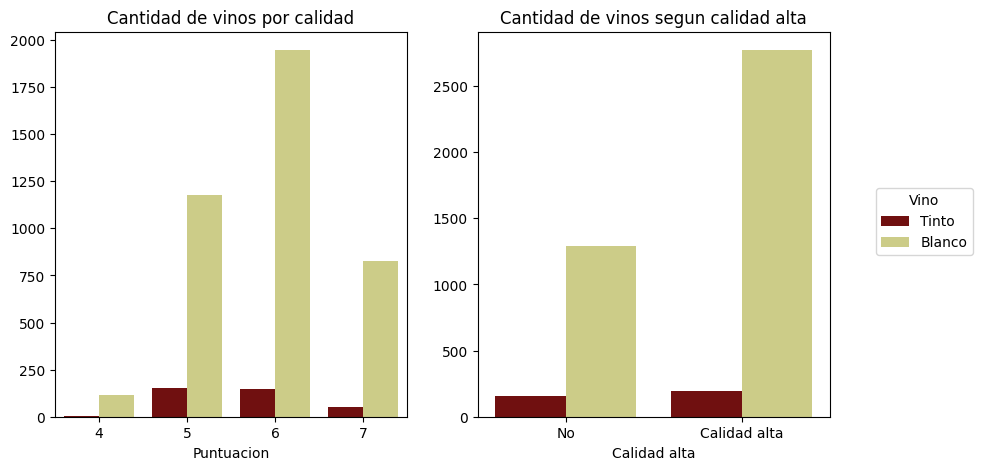

In [ ]:
paleta = {'tinto': '#800000', 'blanco': '#d8d87c'}

fig, ax = plt.subplots(1,2, figsize = (10,5))

sns.countplot(data=wine_df, x='calidad', hue='vino', palette=paleta, ax=ax[0])
ax[0].set_title('Cantidad de vinos por calidad')
ax[0].set_ylabel('')
ax[0].set_xlabel('Puntuacion')
ax[0].legend_.remove()


sns.countplot(data=wine_df, x='calidad_alta', hue='vino', palette=paleta, ax= ax[1])
ax[1].set_title('Cantidad de vinos segun calidad alta')
ax[1].set_xlabel('Calidad alta')
ax[1].set_ylabel('')
ax[1].set_xticks([0,1], labels = ['No', 'Calidad alta'])
ax[1].legend_.remove()

fig.legend(wine_df['vino'].str.capitalize().unique(), title='Vino', loc='center right', ncol=1, bbox_to_anchor=(1.05, 0.5))


plt.show()

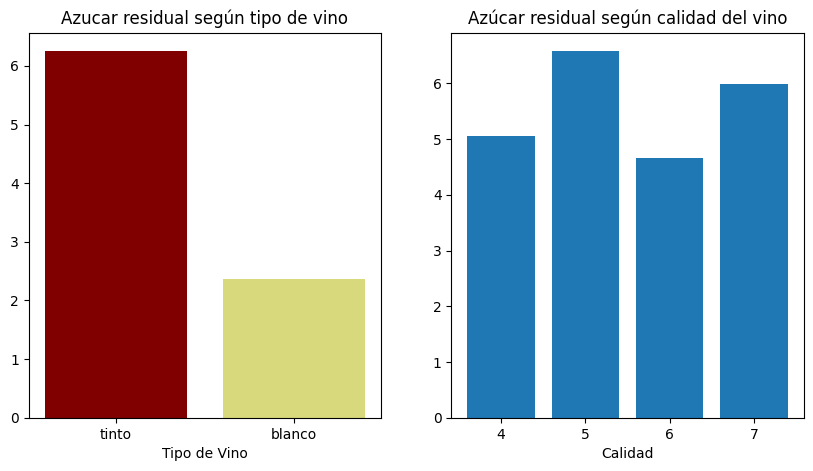

In [ ]:
fig, ax = plt.subplots(1,2, figsize = (10,5))

ax[0].bar(wine_df['vino'].unique(), wine_df.groupby('vino')['azucar_residual'].mean(), color = ['#800000', '#d8d87c'])
ax[0].set_title('Azucar residual según tipo de vino')
ax[0].set_xlabel('Tipo de Vino')

ax[1].bar(wine_df['calidad'].unique(), wine_df.groupby('calidad')['azucar_residual'].mean())
ax[1].set_title('Azúcar residual según calidad del vino')
ax[1].set_xlabel('Calidad')

plt.show()

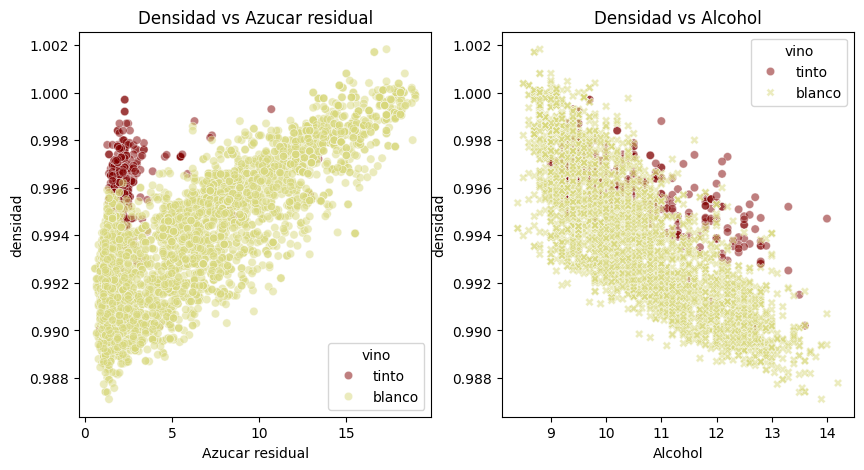

In [ ]:
fig, ax = plt.subplots(1,2, figsize = (10,5))
sns.scatterplot(wine_df,x = wine_df['azucar_residual'], y = wine_df['densidad'], hue = wine_df['vino'], ax=ax[0],
                 palette = ['#800000', '#d8d87c'], alpha = 0.5)
ax[0].set_title('Densidad vs Azucar residual')
ax[0].set_xlabel('Azucar residual')

sns.scatterplot(wine_df,x = wine_df['alcohol'], y = wine_df['densidad'],
                hue = wine_df['vino'], ax=ax[1], palette = ['#800000', '#d8d87c'],
                style='vino',
                alpha = 0.5)
ax[1].set_title('Densidad vs Alcohol')
ax[1].set_xlabel('Alcohol')

plt.show()


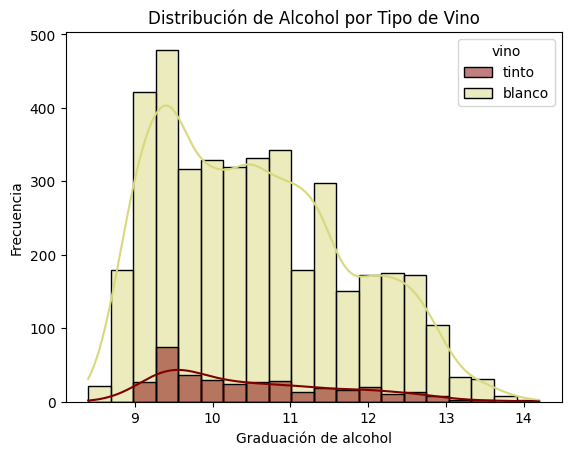

In [ ]:
sns.histplot(data=wine_df, x='alcohol', hue='vino', kde=True, bins=20, palette = ['#800000', '#d8d87c'])
plt.title('Distribución de Alcohol por Tipo de Vino')
plt.xlabel('Graduación de alcohol')
plt.ylabel('Frecuencia')
plt.show()

<Axes: xlabel='calidad', ylabel='alcohol'>

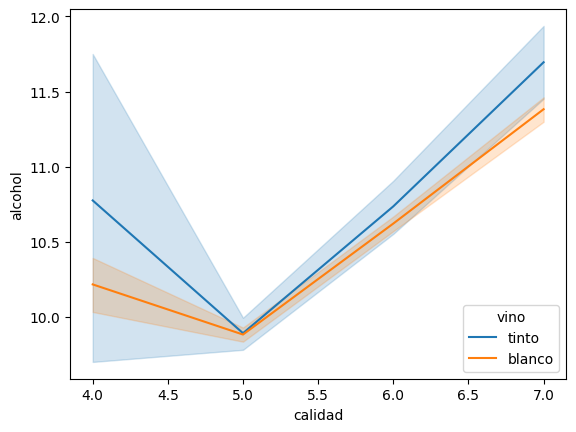

In [ ]:
sns.lineplot(data=wine_df, x='calidad', y='alcohol', hue='vino', estimator='mean')


Podemos graficar en los ejes de fig con un bucle que muestre todas las correlaciones de 'densidad' con las demas variables.

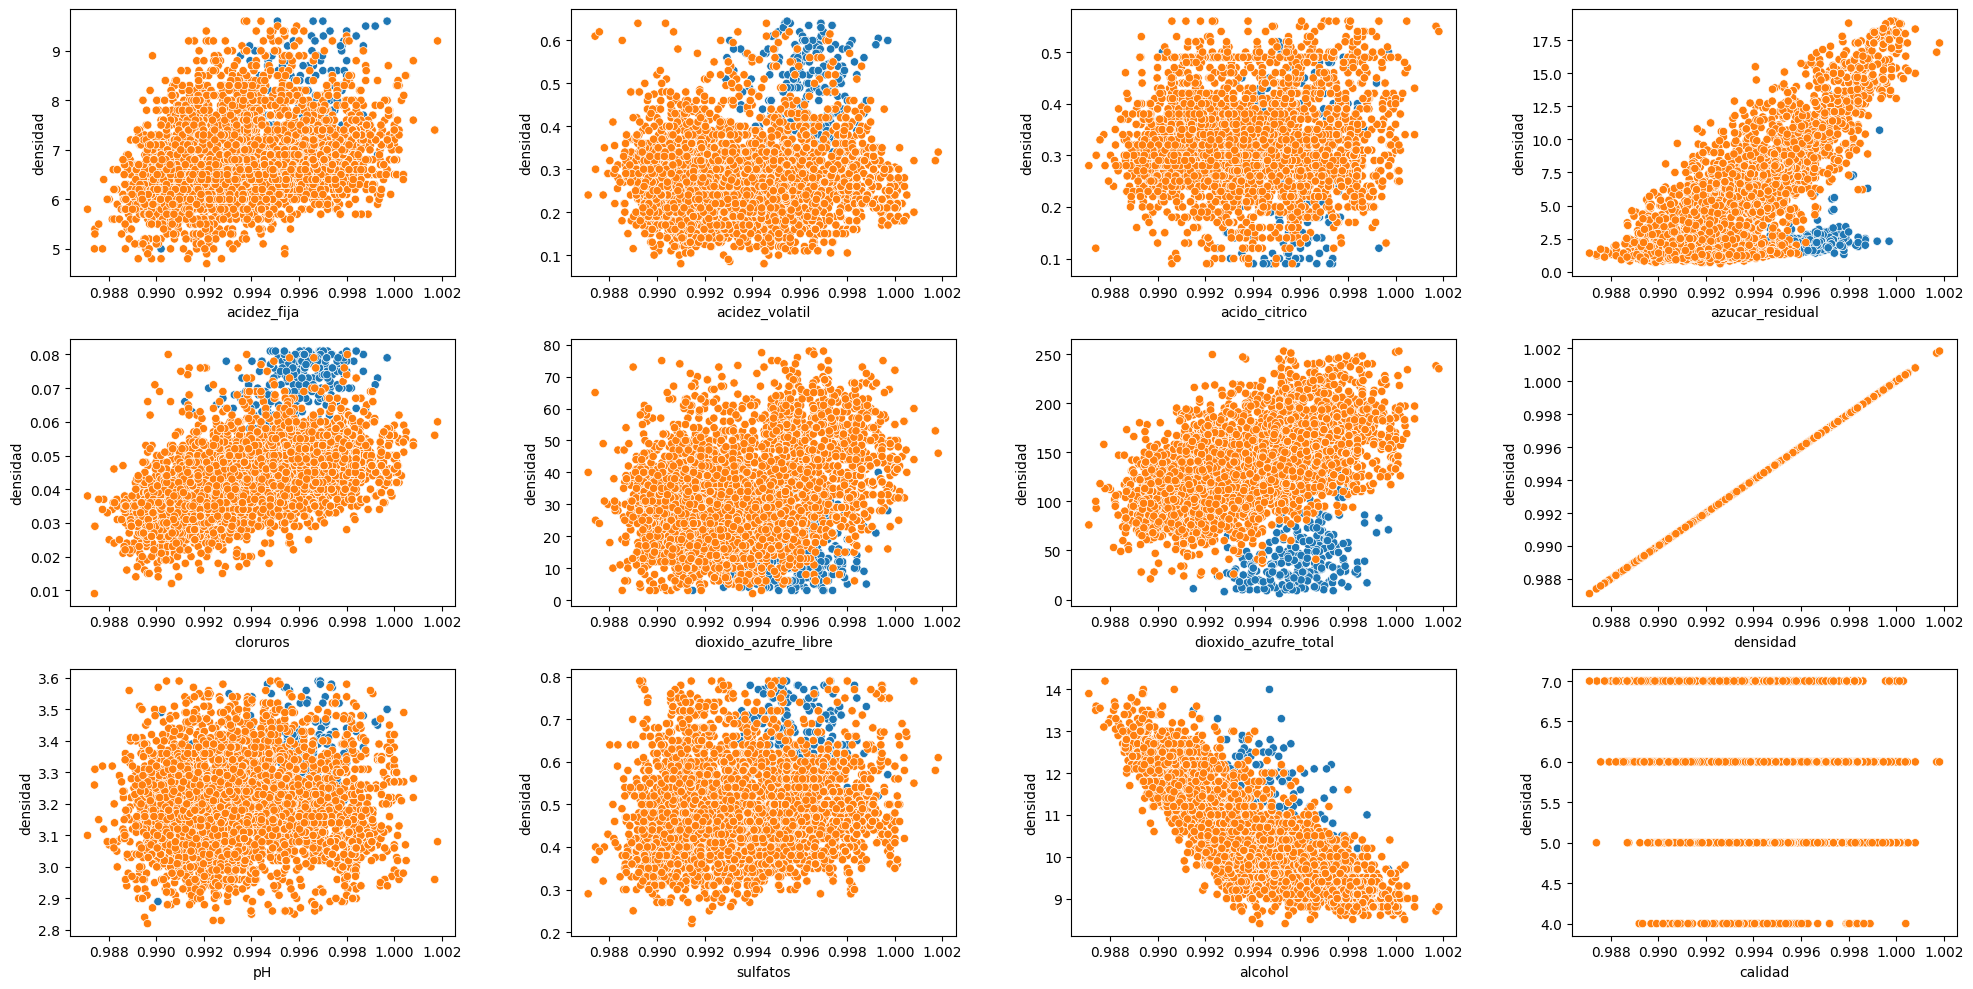

In [ ]:
fig, ax = plt.subplots(3,4, figsize = (20,10))
for i in range(3):
  for j in range(4):
    sns.scatterplot(wine_df,y = wine_df.iloc[:,i*4+j], x = wine_df['densidad'],
                hue = wine_df['vino'], ax=ax[i,j])
    ax[i,j].set_ylabel('densidad')
    ax[i,j].set_xlabel(wine_df.columns[i*4+j])
    ax[i,j].legend_.remove()

plt.tight_layout()

plt.show()

Las más llamativas son los gráfico correspondientes a la densidad vs alcohol, y la densidad vs acidez fija

Hacemos lo mismo con la graduación de alcohol y las demás variables

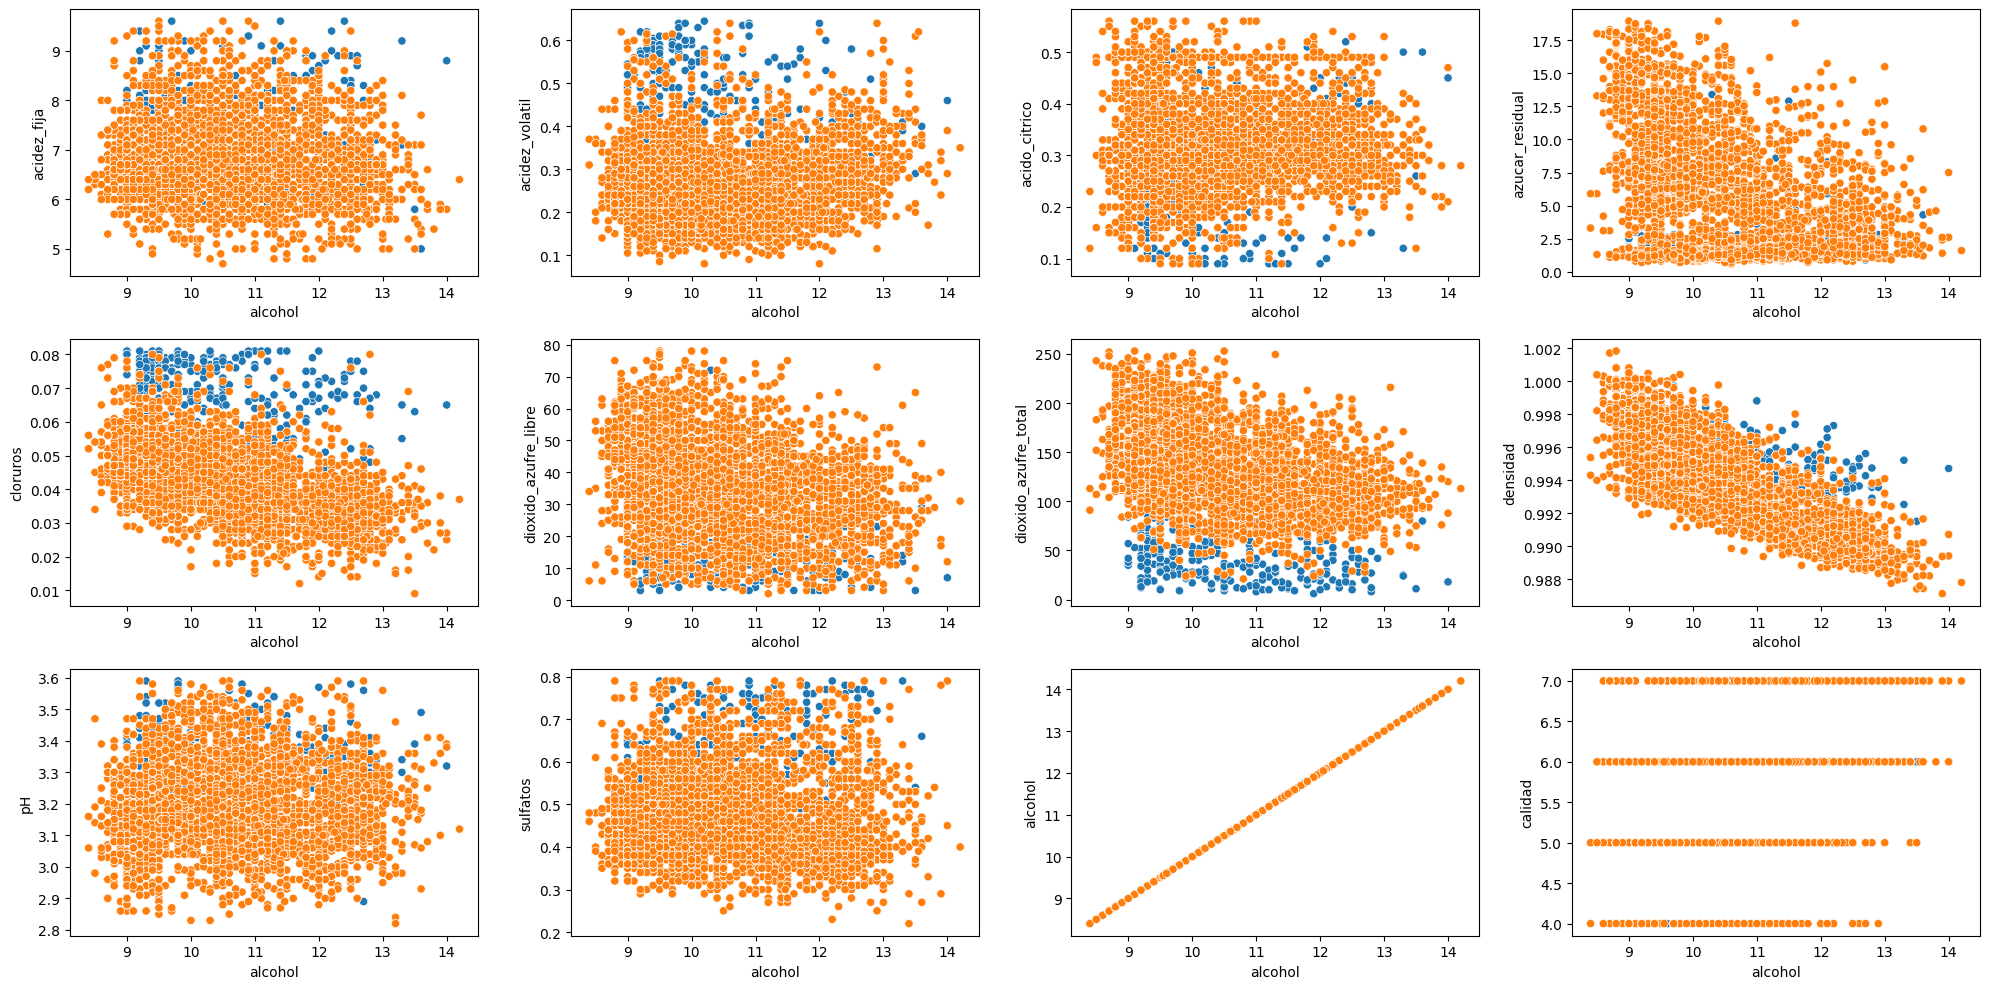

In [ ]:
fig, ax = plt.subplots(3,4, figsize = (20,10))
for i in range(3):
  for j in range(4):
    sns.scatterplot(wine_df,x = wine_df['alcohol'], y = wine_df.iloc[:,i*4+j],
                hue = wine_df['vino'], ax=ax[i,j])
    ax[i,j].set_xlabel('alcohol')
    ax[i,j].set_ylabel(wine_df.columns[i*4+j])
    ax[i,j].legend_.remove()

plt.tight_layout()

plt.show()

En estos casos no pareciera haber mucha correlación por fuera de la que ya habíamos observado: alcohol vs densidad

Esto mismo lo podemos ver gráficamente para cada columna con todas las demás por medio de un mapa de calor con la función de seaborn sns.heatmap()

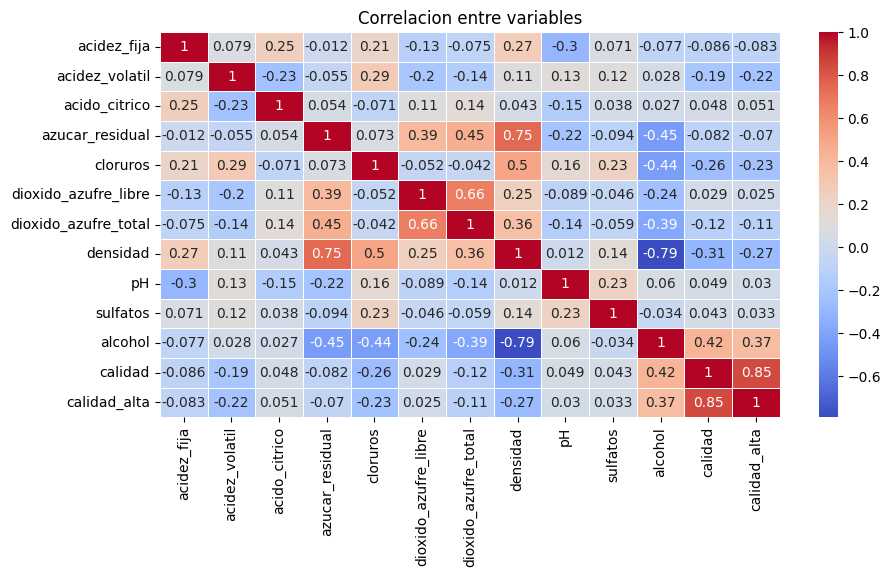

In [ ]:
plt.figure(figsize = (10,5))
sns.heatmap(wine_df.drop('vino', axis=1).corr(), annot = True, cmap = 'coolwarm', linewidths = 0.5)
plt.title('Correlacion entre variables')
plt.show()

# **7 - Apreciaciones parciales**

Podemos decir por el momento que en el dataset hay muchos más casos de vinos blancos que de tintos.

Que conforme aumenta la calidad de un vino también aumenta en promedio su graduación en alcohol como se ve en los casos tanto de vino tinto como de vino blanco

El azúcar residual de los vinos tintos es mucho mayor que la de los vinos blancos

Según los boxplots, la graduación de alcohol para los cuartiles 1 al cuartil 3, en los vinos blancos varía desde los aproximadamente 9,5 % al 11,5 % y en los vinos tintos estos valores varían de 9,5 % a 11 %

La única correlación que pudimos ver en el gráfico de dispersión fue que la graduación de alcohol y la densidad del vino se relacionan de forma inversa.

Se puede concluir que fueron mejores los modelos de clasificación para predecir el tipo de vino que los modelos de regresión para predecir la calidad de los mismos.

Dentro de los modelos de clasificación, es mejor el modelo de árbol de decisión porque predice con un alto porcentaje el tipo de vino tanto en el set de entrenamiento como en el set de prueba (95 % aproximadamente para el primero y apenas por encima del 96 % para el segundo) sin incurrir en una efectividad exagerada, cercana al 100 %. En contraposición, el modelo de random forest tiene una efectividad superior al 99 % tanto en el set de entrenamiento como en el de prueba. Por esta razón sería conveniente desestimar dicho modelo.

Por otra parte, y adentrándonos en los modelos de regresión, se puede decir que estos predicen la calidad de los vinos con error bajo. Sin embargo, ambos modelos son poco efectivos para predecir las calificaciones menos frecuentes como se observa en los últimos gráficos. Esto muestra que no es robusto ningún modelo para predecir la calidad de los vinos. Sería necesario ajustar parámetros o buscar otros modelos.

Para predecir el tipo de vino, es conveniente utilizar el DecisionTreeClassifier. Para predecir la calidad de los vinos, se opta por el RandomForestRegressor, que es predice la calidad con un poco menos de error que el DecisionTreeRegressor.

Para el problema ficticio que nos concierne de una cata de vinos, convendría seleccionar aquellos vinos que el modelo predijo de calidad 5, 6 o incluso 7 para presentar en el certamen. Los que fueron predichos con mayor puntaje, podrian ser seleccionados, con la condición de considerar que no es tan cierto que su calidad sea tan alta. Sin embargo, en el peor de los casos, el modelo estaría sobrestimando vinos de calidad 5 o 6 como un vino de calidad 9, sería muy raro que el modelo considere con un muy alto puntaje un vino de muy baja calidad. Esto último se fundamenta con lo bajo que fueron los errores de los modelos.